In [24]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
# Import the datetime module from the datetime library.
from datetime import datetime

In [25]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90, high = 90, size =1500)
lngs = np.random.uniform(low=-180, high = 180, size =1500)
lats_lngs = zip(lats, lngs)

In [26]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [27]:
len(coordinates)

1500

In [28]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        #print(city)

    

In [29]:
# Print the city count to confirm sufficient count.
len(cities)

640

In [36]:
cities[1].title()

'Zhangjiakou'

In [31]:
# Import the API key.
from config import weather_api_key
from config import g_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [33]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
#for i in range(len(cities)):
#
#   # Group cities in sets of 50 for logging purposes.
#    if (i % 50 == 0 and i >= 50):
#        set_count += 1
#        record_count = 1
#    # Create endpoint URL with each city.
#    city_url = url + "&q=" + cities[i]
    

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    #print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | buraydah
Processing Record 2 of Set 1 | zhangjiakou
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | san quintin
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | nabire
Processing Record 7 of Set 1 | hovd
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | nanortalik
Processing Record 11 of Set 1 | seoul
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | nantucket
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | tuktoyaktuk
Processing Record 16 of Set 1 | chuy
Processing Record 17 of Set 1 | fortuna
Processing Record 18 of Set 1 | mastic beach
Processing Record 19 of Set 1 | el wasta
City not found. Skipping...
Processing Record 20 of Set 1 | baherden
Processing Record 21 of Set 1 | redhakhol
City not found. Skipping...
Processing Record 22 of Set 1 | broo

Processing Record 36 of Set 4 | arman
Processing Record 37 of Set 4 | tasiilaq
Processing Record 38 of Set 4 | vanderhoof
Processing Record 39 of Set 4 | shenjiamen
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | casas adobes
Processing Record 42 of Set 4 | marsa matruh
Processing Record 43 of Set 4 | prainha
Processing Record 44 of Set 4 | mahebourg
Processing Record 45 of Set 4 | alibag
Processing Record 46 of Set 4 | khatanga
Processing Record 47 of Set 4 | ha tinh
Processing Record 48 of Set 4 | ponta do sol
Processing Record 49 of Set 4 | asau
Processing Record 50 of Set 4 | preeceville
Processing Record 1 of Set 5 | starokozache
Processing Record 2 of Set 5 | tapaua
City not found. Skipping...
Processing Record 3 of Set 5 | olafsvik
Processing Record 4 of Set 5 | micheweni
Processing Record 5 of Set 5 | gemena
Processing Record 6 of Set 5 | tiksi
Processing Record 7 of Set 5 | sisimiut
Processing Record 8 of Set 5 | grindavik
Processing Record 9 of Set 5

Processing Record 27 of Set 8 | woodway
Processing Record 28 of Set 8 | port moresby
Processing Record 29 of Set 8 | hasaki
Processing Record 30 of Set 8 | lagoa
Processing Record 31 of Set 8 | zhanaozen
Processing Record 32 of Set 8 | grand gaube
Processing Record 33 of Set 8 | mahon
Processing Record 34 of Set 8 | bubaque
Processing Record 35 of Set 8 | linhares
Processing Record 36 of Set 8 | cabo san lucas
Processing Record 37 of Set 8 | zheleznodorozhnyy
Processing Record 38 of Set 8 | eureka
Processing Record 39 of Set 8 | maraba
Processing Record 40 of Set 8 | vostok
Processing Record 41 of Set 8 | santa ines
Processing Record 42 of Set 8 | ichalkaranji
Processing Record 43 of Set 8 | linxia
Processing Record 44 of Set 8 | baruun-urt
Processing Record 45 of Set 8 | oyama
Processing Record 46 of Set 8 | simao
Processing Record 47 of Set 8 | itaobim
Processing Record 48 of Set 8 | sovetskiy
Processing Record 49 of Set 8 | klaksvik
Processing Record 50 of Set 8 | tabou
Processing R

Processing Record 16 of Set 12 | manavalakurichi
Processing Record 17 of Set 12 | puebloviejo
Processing Record 18 of Set 12 | bhowali
Processing Record 19 of Set 12 | samarai
Processing Record 20 of Set 12 | karaul
City not found. Skipping...
Processing Record 21 of Set 12 | leningradskiy
Processing Record 22 of Set 12 | tazmalt
Processing Record 23 of Set 12 | los andes
Processing Record 24 of Set 12 | rangoon
Processing Record 25 of Set 12 | port hardy
Processing Record 26 of Set 12 | brae
Processing Record 27 of Set 12 | roebourne
Processing Record 28 of Set 12 | hokitika
Processing Record 29 of Set 12 | anar darreh
City not found. Skipping...
Processing Record 30 of Set 12 | mokolo
Processing Record 31 of Set 12 | inderborskiy
City not found. Skipping...
Processing Record 32 of Set 12 | wum
Processing Record 33 of Set 12 | conceicao da barra
Processing Record 34 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 35 of Set 12 | chernyshevskiy
Processing Record 

In [38]:
 # Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Buraydah,26.3260,43.9750,77.45,15,1,7.05,SA,2021-05-27 02:23:31
1,Zhangjiakou,40.8100,114.8794,66.49,28,99,11.16,CN,2021-05-27 02:27:31
2,Rikitea,-23.1203,-134.9692,74.70,70,91,17.31,PF,2021-05-27 02:24:02
3,San Quintin,30.4833,-115.9500,61.93,81,100,12.46,MX,2021-05-27 02:28:08
4,Hilo,19.7297,-155.0900,81.28,78,90,13.80,US,2021-05-27 02:28:09
5,Nabire,-3.3667,135.4833,85.82,68,46,3.06,ID,2021-05-27 02:28:09
6,Hovd,48.0056,91.6419,66.58,33,0,3.94,MN,2021-05-27 02:28:09
7,Cape Town,-33.9258,18.4232,56.12,89,0,5.39,ZA,2021-05-27 02:24:42
8,Vaini,-21.2000,-175.2000,78.96,73,20,11.50,TO,2021-05-27 02:28:10
9,Nanortalik,60.1432,-45.2371,36.88,92,99,9.22,GL,2021-05-27 02:28:10


In [39]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng","Max Temp", "Humidity","Cloudiness","Wind Speed"] 

In [40]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Buraydah,SA,2021-05-27 02:23:31,26.3260,43.9750,77.45,15,1,7.05
1,Zhangjiakou,CN,2021-05-27 02:27:31,40.8100,114.8794,66.49,28,99,11.16
2,Rikitea,PF,2021-05-27 02:24:02,-23.1203,-134.9692,74.70,70,91,17.31
3,San Quintin,MX,2021-05-27 02:28:08,30.4833,-115.9500,61.93,81,100,12.46
4,Hilo,US,2021-05-27 02:28:09,19.7297,-155.0900,81.28,78,90,13.80


In [41]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label = "City ID")

In [43]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

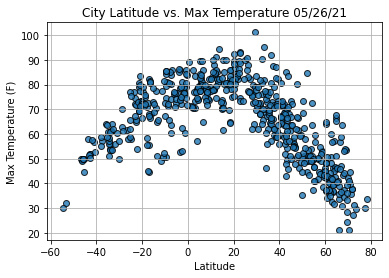

In [51]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

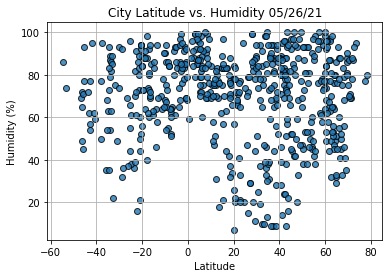

In [52]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

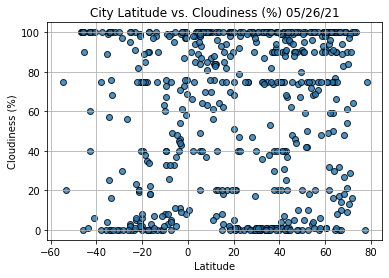

In [53]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

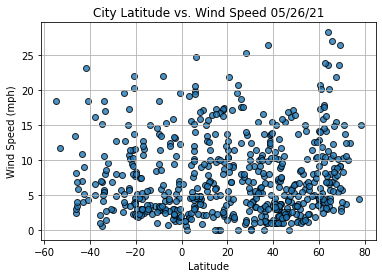

In [54]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()